In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / "data"

Load roster

In [3]:
roster = pd.read_csv(
    DATA_DIR / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID"
)


In [4]:
roster.head(10)

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
rxs30280,richard.saunders@univ.edu,1
dma58910,daisy.anderson@univ.edu,2
hsw06874,holly.watson@univ.edu,2
bkr19538,brandy.reilly@univ.edu,2


Load the homework and the exam grades

In [5]:
hw_exam_grades = pd.read_csv(
    DATA_DIR / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col="SID"
)

In [6]:
hw_exam_grades.head(10)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
ara97741,Amy,Adams,49.0,80,53,80,55,80,78,100,...,39,60,54,60,87,100,74,100,76,100
alw07647,Amy,White,71.0,80,60,80,72,80,95,100,...,47,60,41,60,99,100,95,100,99,100
axd67070,Amy,Dunn,72.0,80,61,80,50,80,90,100,...,48,60,50,60,93,100,96,100,86,100
ajt73762,Amy,Terry,71.0,80,54,80,76,80,93,100,...,54,60,49,60,60,100,81,100,79,100


Load quiz grades (quiz_1_grades.csv, ..., quiz_5_grades.csv)

In [7]:
quiz_grades = pd.DataFrame()

for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"]
    ).rename(columns={"Grade": quiz_name})
    
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [8]:
quiz_grades.head()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [9]:
final_df = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

In [10]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [11]:
quiz_grades.columns

Index(['Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5'], dtype='object')

In [12]:
quiz_grades.index

Index(['richard.bennett@univ.edu', 'timothy.parker@univ.edu',
       'carol.reyes@univ.edu', 'brooke.powers@univ.edu',
       'michael.taylor@univ.edu', 'belinda.bailey@univ.edu',
       'marcia.stevens@univ.edu', 'katelyn.faulkner@univ.edu',
       'william.daniel@univ.edu', 'dylan.johnson@univ.edu',
       ...
       'tamara.warren@univ.edu', 'courtney.wolf@univ.edu',
       'brandon.flores@univ.edu', 'patricia.evans@univ.edu',
       'luke.davidson@univ.edu', 'jeffrey.perez@univ.edu',
       'angela.dunlap@univ.edu', 'richard.elliott@univ.edu',
       'donna.nguyen@univ.edu', 'timothy.ramirez@univ.edu'],
      dtype='object', name='Email', length=150)

In [13]:
final_df = pd.merge(final_df, quiz_grades, left_on="Email Address", right_index=True)

In [14]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


In [15]:
final_df = final_df.fillna(0)

In [16]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


### Calculating final grades

### Exam Grades

In [18]:
n_exams = 3

for n in range(1, n_exams + 1):
    final_df[f"Exam {n} Score"] = final_df[f"Exam {n}"] / final_df[f"Exam {n} - Max Points"]

In [19]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,0.96,0.80,0.86


In [20]:
final_df[[x for x in final_df.columns if "Home" in x and "Max" in x]]

,Homework 1 - Max Points,Homework 2 - Max Points,Homework 3 - Max Points,Homework 4 - Max Points,Homework 5 - Max Points,Homework 6 - Max Points,Homework 7 - Max Points,Homework 8 - Max Points,Homework 9 - Max Points,Homework 10 - Max Points
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,80,80,100,70,90,50,70,60,60
dsl24347,80,80,80,100,70,90,50,70,60,60
nxe44872,80,80,80,100,70,90,50,70,60,60
bxr62103,80,80,80,100,70,90,50,70,60,60


In [21]:
hw_max_cols = sorted([x for x in final_df.columns if "Home" in x and "Max" in x])
hw_cols = sorted([x for x in final_df.columns if "Home" in x and "Max" not in x])

In [22]:
hw_max_cols

['Homework 1 - Max Points',
 'Homework 2 - Max Points',
 'Homework 3 - Max Points',
 'Homework 4 - Max Points',
 'Homework 5 - Max Points',
 'Homework 6 - Max Points',
 'Homework 7 - Max Points',
 'Homework 8 - Max Points',
 'Homework 9 - Max Points',
 'Homework 10 - Max Points']

In [23]:
hw_cols

['Homework 1',
 'Homework 2',
 'Homework 3',
 'Homework 4',
 'Homework 5',
 'Homework 6',
 'Homework 7',
 'Homework 8',
 'Homework 9',
 'Homework 10']

In [24]:
hw_score_by_total = final_df[hw_cols].sum(axis=1) / final_df[hw_max_cols].sum(axis=1)

In [25]:
final_df["HW by total"] = hw_score_by_total

In [26]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by total
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,4,10,11,7,10,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,8,10,10,13,6,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,8,6,14,9,4,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,8,8,8,13,5,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,6,14,11,7,7,0.96,0.80,0.86,0.782432


In [27]:
hw_max_data = final_df[hw_max_cols].set_axis(hw_cols,axis=1)

In [28]:
hw_score_by_avg = (final_df[hw_cols] / hw_max_data).sum(axis=1) / len(hw_cols)

In [29]:
final_df["HW by average"] = hw_score_by_avg

In [30]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by total,HW by average
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742


In [31]:
final_df["Homework Score"] = final_df[["HW by total", "HW by average"]].max(axis=1)

In [32]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by total,HW by average,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742


In [33]:
quiz_scores = final_df.filter(regex=r"^Quiz \d$", axis=1)

In [34]:
n_quiz = quiz_scores.shape[1]

In [37]:
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

In [39]:
quiz_score_by_total = quiz_scores.sum(axis=1) / quiz_max_points.sum()

In [40]:
quiz_score_by_avg = (quiz_scores / quiz_max_points).sum(axis=1) / n_quiz

In [41]:
final_df["Quiz Score"] = pd.concat([quiz_score_by_total, quiz_score_by_avg], axis=1).max(axis=1)

In [42]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by total,HW by average,Homework Score,Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174


In [57]:
weights = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.10,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,        
    }
)

In [58]:
final_df["Final Score"] = (final_df[weights.index] * weights).sum(axis=1)

In [59]:
final_df["Ceiling Score"] = np.ceil(final_df["Final Score"] * 100)

In [60]:
def get_letter_grade(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

In [61]:
letter_grades = final_df["Ceiling Score"].map(get_letter_grade)

In [62]:
final_df["Final Grade"] = pd.Categorical(
    letter_grades, categories=["F", "D", "C", "B", "A"], ordered=True
)

In [63]:
final_df["Final Grade"]

wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Final Grade, Length: 150, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [66]:
cols_to_write = ["Last Name", "First Name", "Email Address", "Ceiling Score", "Final Grade"]

In [68]:
g = final_df.groupby("Section")

In [70]:
g.groups

{1: ['wxb12345', 'txj12345', 'rxs30280', 'edh14938', 'rjb91830', 'bdp78944', 'jty40106', 'cxg21963', 'tsw14969', 'jlh15029', 'msl77920', 'thh29195', 'jxm83777', 'txt65366', 'cxd92501', 'kxf45205', 'bxs54690', 'djb29817', 'sgm04582', 'bms82804', 'mxj54725', 'jxw98212', 'jmp63760', 'sxw76890', 'rge65208', 'dxp49123', 'pmk49230', 'sxv18182', 'rkr43763', 'ksp17362', 'txw75701', 'sxt33634', 'txp55047', 'jxb40799', 'tmo55387', 'mjp68159', 'kam90876', 'dcj14616', 'ara97741', 'jag55224', 'eed42850', 'cxh80084', 'lxb98047', 'mxl67812', 'exd72538', 'mxs33416', 'txf41578', 'jxu45537', 'kxs29884', 'bch39598', 'axw80146', 'mjg41514', 'dxn21936', 'cxa22039', 'nxm87406', 'jxw53347'], 2: ['mxl12345', 'smj00936', 'dma58910', 'hsw06874', 'bkr19538', 'lxc64780', 'rxd29805', 'sem28474', 'bjg14618', 'hxg56446', 'sbr74322', 'skr62062', 'djd31335', 'smg03171', 'ksb85997', 'wad63934', 'amc28428', 'lmb95641', 'aes07091', 'dsg54218', 'asm59771', 'lba53221', 'kxw26270', 'axd11293', 'jxw87000', 'axc64717', 'tce09

In [71]:
g.get_group(1)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by total,HW by average,Homework Score,Quiz Score,Final Score,Ceiling Score,Final Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.745852,75.0,C
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.722637,73.0,C
rxs30280,richard.saunders@univ.edu,1,Richard,Saunders,53.0,80,56,80,48,80,...,0.65,0.93,0.64,0.710811,0.708837,0.710811,0.836384,0.756740,76.0,C
edh14938,emily.houston@univ.edu,1,Emily,Houston,54.0,80,60,80,56,80,...,1.00,0.78,0.87,0.758108,0.766294,0.766294,0.724638,0.782409,79.0,C
rjb91830,richard.bennett@univ.edu,1,Richard,Bennett,76.0,80,75,80,77,80,...,0.66,0.97,0.88,0.829730,0.827508,0.829730,0.648653,0.788488,79.0,C
bdp78944,brooke.powers@univ.edu,1,Brooke,Powers,80.0,80,60,80,53,80,...,0.77,0.87,0.90,0.797297,0.802885,0.802885,0.739130,0.803393,81.0,B
jty40106,joseph.young@univ.edu,1,Joseph,Young,51.0,80,69,80,60,80,...,0.72,0.68,0.96,0.774324,0.790048,0.790048,0.797107,0.803151,81.0,B
cxg21963,cynthia.guzman@univ.edu,1,Cynthia,Guzman,63.0,80,68,80,48,80,...,0.64,0.74,0.66,0.740541,0.751512,0.751512,0.753623,0.731692,74.0,C
tsw14969,tamara.warren@univ.edu,1,Tamara,Warren,74.0,80,53,80,48,80,...,0.77,0.80,0.99,0.794595,0.801766,0.801766,0.840580,0.839880,84.0,B
jlh15029,john.harris@univ.edu,1,John,Harris,74.0,80,77,80,53,80,...,0.91,0.90,0.95,0.862162,0.859667,0.862162,0.777194,0.856023,86.0,B


In [75]:
for section, df in final_df.groupby("Section"):
    section_file = DATA_DIR / f"section_{section}_grades.csv"
    df[cols_to_write].sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In [76]:
pd.read_csv(DATA_DIR / "section_1_grades.csv")

,Unnamed: 0,Last Name,First Name,Email Address,Ceiling Score,Final Grade
0,ara97741,Adams,Amy,amy.adams@univ.edu,75.0,C
1,cxa22039,Allen,Christina,christina.allen@univ.edu,79.0,C
2,lxb98047,Baldwin,Lucas,lucas.baldwin@univ.edu,83.0,B
3,wxb12345,Barrera,Woody,woody.barrera_jr@univ.edu,75.0,C
4,jxb40799,Bauer,John,john.bauer@univ.edu,78.0,C
5,djb29817,Beck,David,david.beck@univ.edu,68.0,D
6,rjb91830,Bennett,Richard,richard.bennett@univ.edu,79.0,C
7,cxd92501,Dennis,Cameron,cameron.dennis@univ.edu,67.0,D
8,eed42850,Dudley,Emily,emily.dudley@univ.edu,74.0,C
9,exd72538,Duffy,Erin,erin.duffy@univ.edu,79.0,C


In [79]:
grade_counts = final_df["Final Grade"].value_counts().sort_index()

<AxesSubplot:>

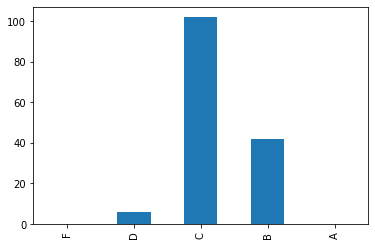

In [80]:
grade_counts.plot.bar()

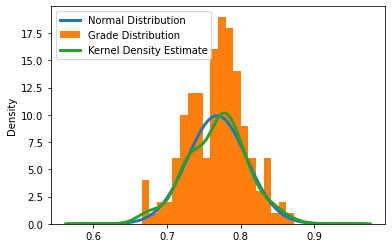

In [85]:
grade_mean = final_df["Final Score"].mean()
grade_std = final_df["Final Score"].std()

import scipy.stats
import matplotlib.pyplot as plt

x = np.linspace(grade_mean -5*grade_std, grade_mean + 5*grade_std, 200)
y = scipy.stats.norm.pdf(x, loc=grade_mean, scale=grade_std)

plt.plot(x, y, label="Normal Distribution", linewidth=3)

final_df["Final Score"].plot.hist(bins=20,label="Grade Distribution")

final_df["Final Score"].plot.density(
    linewidth=3, label="Kernel Density Estimate"
)

plt.legend()